<a href="https://colab.research.google.com/github/kjnikhil6/Logicmojo-AI-ML-Sept25-kjnikhil6/blob/main/Assignment_3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/Logicmojo_DataSciece/Assignment-3-Linear-Regression

 Assignment-3-LinearRegression.ipynb  'Linear Regression Assignment.gdoc'
 dataset.csv			      'Linear Regression Data Dictionary.gdoc'
 dataset.gsheet


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Logicmojo_DataSciece/Assignment-3-Linear-Regression/dataset.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   instant                     730 non-null    int64  
 1   dteday                      730 non-null    object 
 2   season                      730 non-null    int64  
 3   yr                          730 non-null    int64  
 4   mnth                        730 non-null    int64  
 5   holiday                     730 non-null    int64  
 6   weekday                     730 non-null    int64  
 7   workingday                  730 non-null    int64  
 8   weathersit                  730 non-null    int64  
 9   temp                        730 non-null    float64
 10  atemp                       730 non-null    float64
 11  hum                         730 non-null    float64
 12  windspeed                   730 non-null    float64
 13  casual                      730 non

In [8]:
#dropping the Season Category and Weather Situation Category columns since they are already given in season and weathersit columns
df.drop(['Season Category', 'Weather Situation Category'], axis=1, inplace=True)

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#checking for null values
dfSummary = pd.DataFrame({
    'dtype': df.dtypes,
    'missing_count': df.isnull().sum(),
    'missing_%': 100 * df.isnull().sum() / len(df)
}).sort_values('missing_%', ascending=False)
print(dfSummary)

              dtype  missing_count  missing_%
instant       int64              0        0.0
dteday       object              0        0.0
season        int64              0        0.0
yr            int64              0        0.0
mnth          int64              0        0.0
holiday       int64              0        0.0
weekday       int64              0        0.0
workingday    int64              0        0.0
weathersit    int64              0        0.0
temp        float64              0        0.0
atemp       float64              0        0.0
hum         float64              0        0.0
windspeed   float64              0        0.0
casual        int64              0        0.0
registered    int64              0        0.0
cnt           int64              0        0.0


In [11]:
categorical = ['season', 'weathersit', 'mnth', 'weekday', 'holiday', 'workingday']
numerical = ['temp', 'atemp', 'hum', 'windspeed']
target = ['cnt', 'casual', 'registered']

<Axes: >

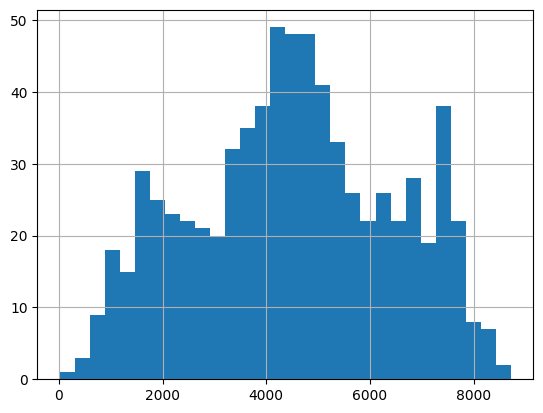

In [12]:
df['cnt'].hist(bins=30)

In [13]:
for cat in categorical:
  print(df[cat].value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64
weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
workingday
1    504
0    226
Name: count, dtype: int64


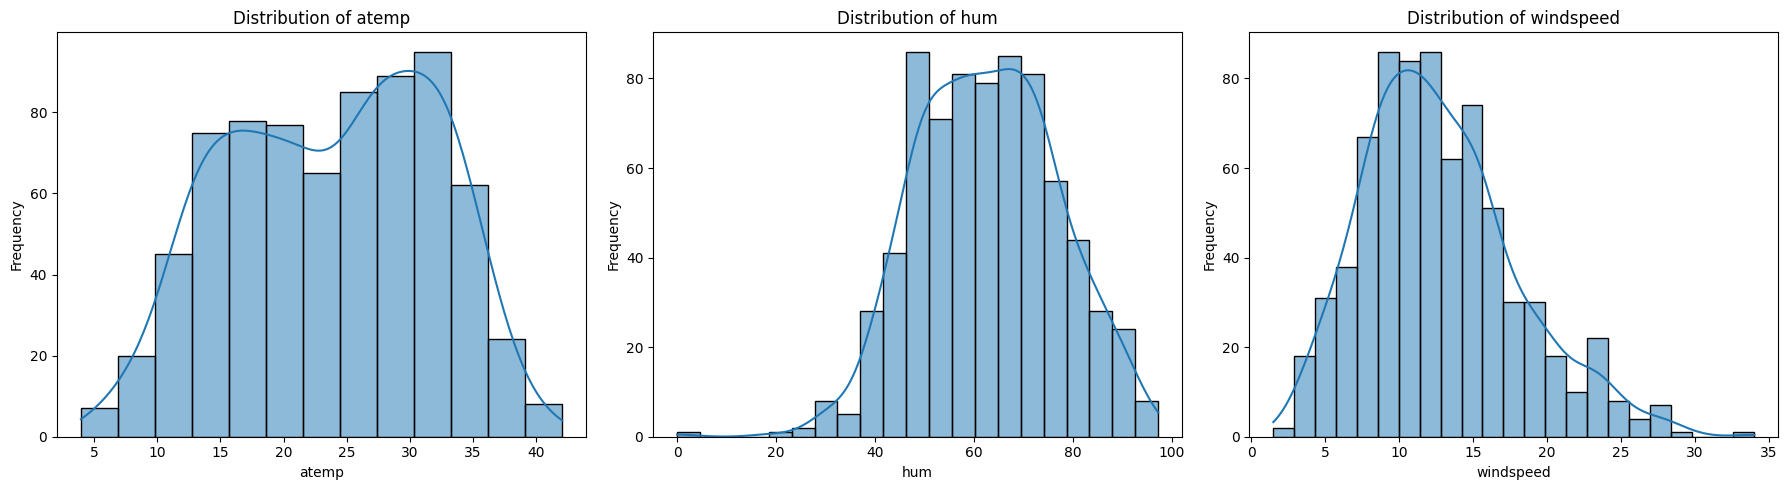

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

remaining_numerical = ['atemp', 'hum', 'windspeed']

for idx, var in enumerate(remaining_numerical):
    sns.histplot(df[var], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Apparent temperature shows a wide and balanced distribution, making it a strong candidate for predicting bike demand. Humidity follows an approximately normal distribution, while wind speed is right-skewed with fewer extreme values.

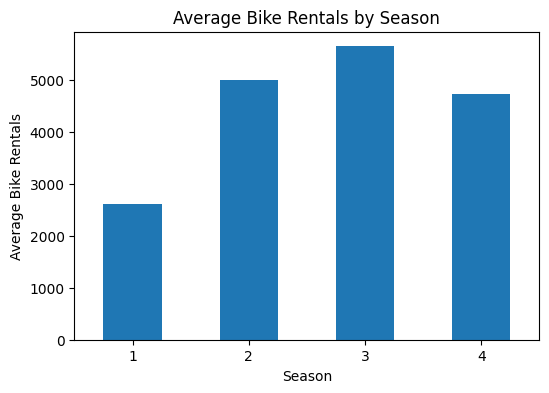

In [15]:
season_cnt = df.groupby('season')['cnt'].mean()

plt.figure(figsize=(6,4))
season_cnt.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Season')
plt.xticks(rotation=0)
plt.show()

more rentals at the fall season
Lower demand in season 1 (winter)

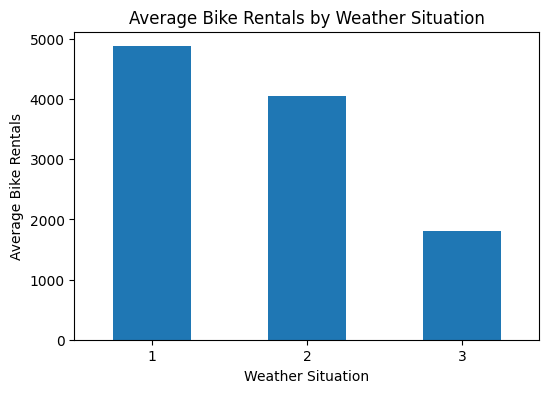

In [16]:
weather_cnt = df.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(6,4))
weather_cnt.plot(kind='bar')
plt.xlabel('Weather Situation')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Weather Situation')
plt.xticks(rotation=0)
plt.show()

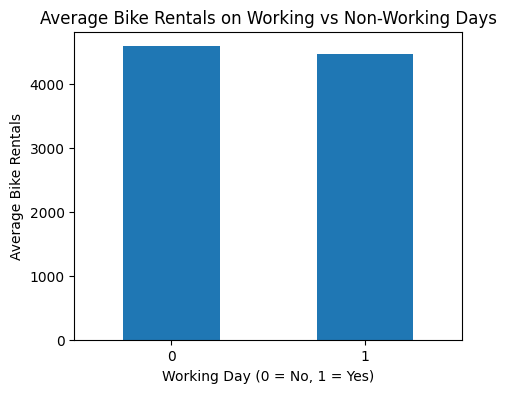

In [17]:
workingday_cnt = df.groupby('workingday')['cnt'].mean()

plt.figure(figsize=(5,4))
workingday_cnt.plot(kind='bar')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals on Working vs Non-Working Days')
plt.xticks(rotation=0)
plt.show()


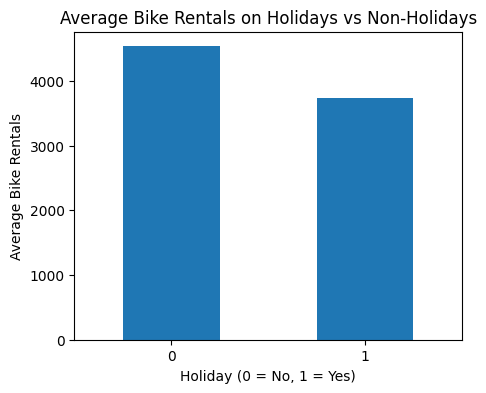

In [18]:
holiday_cnt = df.groupby('holiday')['cnt'].mean()

plt.figure(figsize=(5,4))
holiday_cnt.plot(kind='bar')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals on Holidays vs Non-Holidays')
plt.xticks(rotation=0)
plt.show()


Although holidays are non-working days, they differ from weekends in usage patterns. While holidays show reduced bike demand due to fewer commuters and irregular travel behavior, weekends contribute higher leisure usage. As a result, average rentals on non-working days (which include weekends and holidays) remain comparable to working days, whereas holidays alone exhibit lower demand.

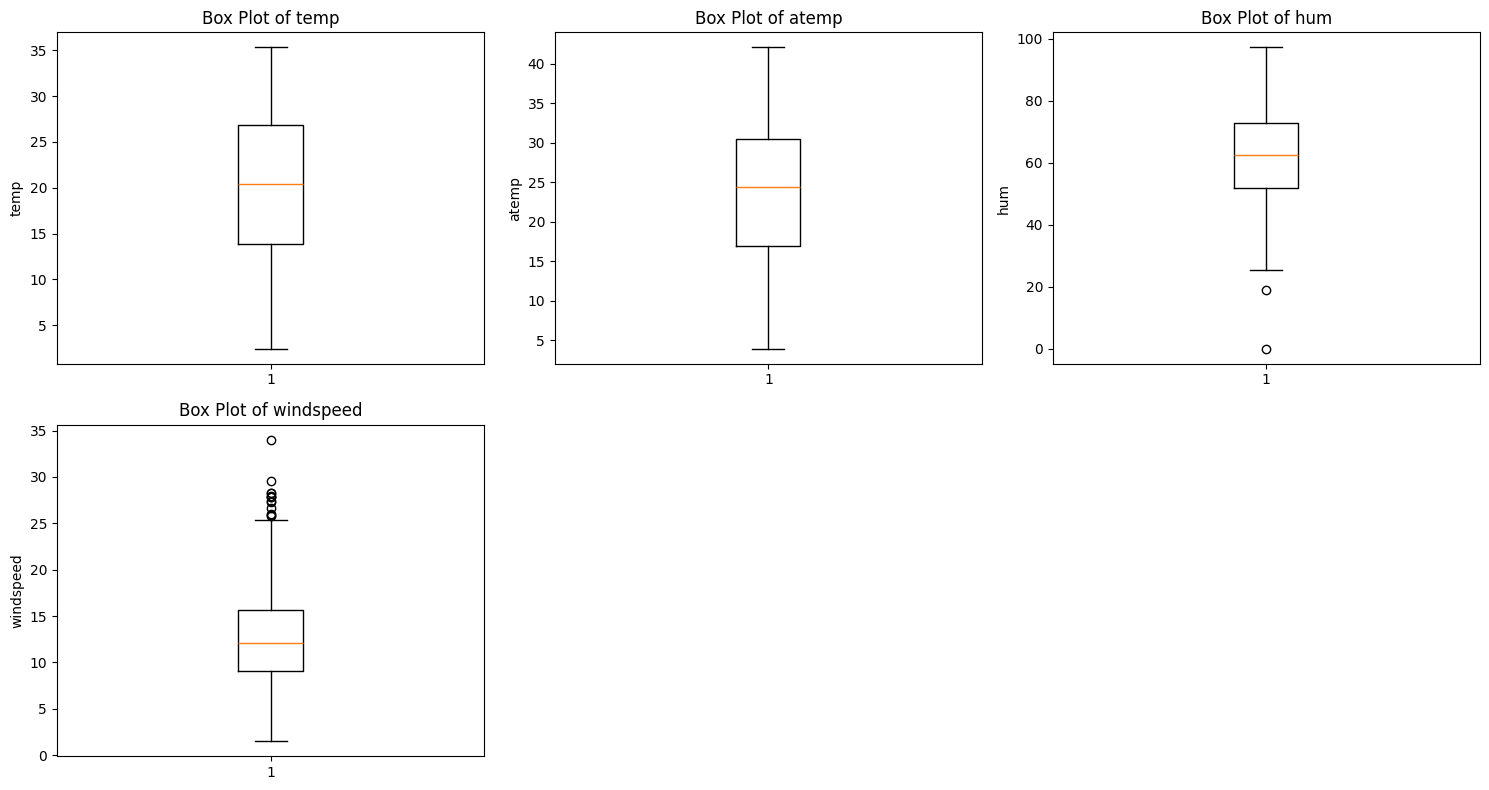

In [19]:
#outlier detection

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, var in enumerate(numerical):
    axes[idx].boxplot(df[var])
    axes[idx].set_title(f'Box Plot of {var}')
    axes[idx].set_ylabel(var)

# Hide unused subplots
for idx in range(len(numerical), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

outliers oberserved in windspeed . but can be igonored

### 3. Bivariant Analysis

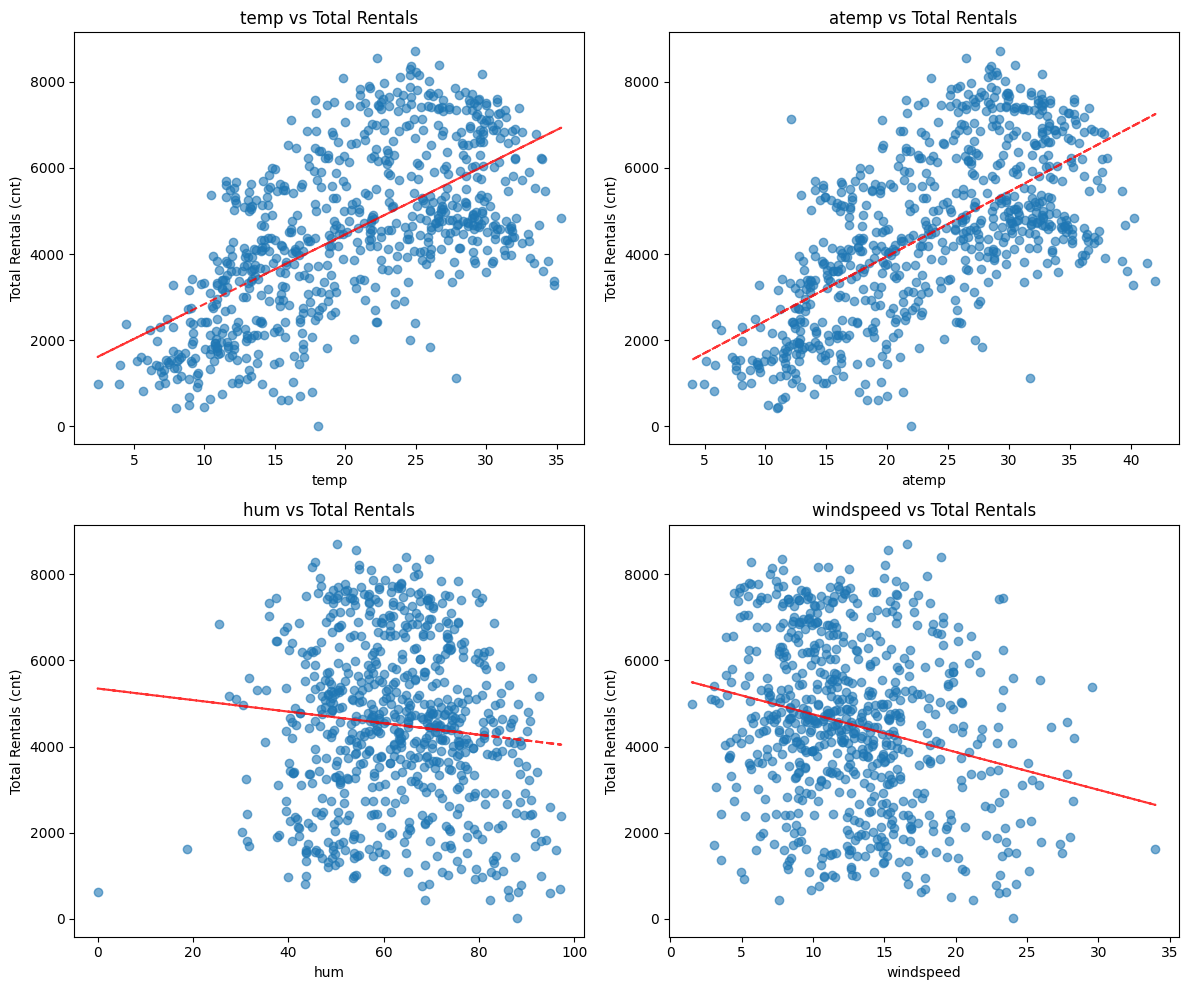

In [20]:
# Create scatter plots for numerical features vs cnt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical):
    axes[idx].scatter(df[feature], df['cnt'], alpha=0.6)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Total Rentals (cnt)')
    axes[idx].set_title(f'{feature} vs Total Rentals')

    # Add trend line
    z = np.polyfit(df[feature], df['cnt'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

In [21]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


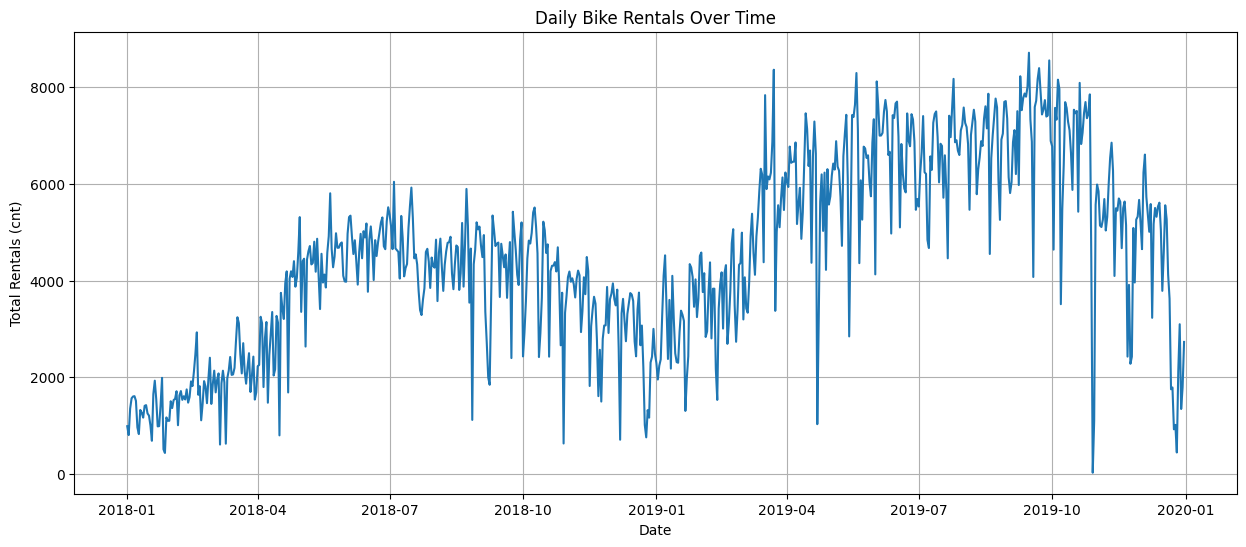

In [22]:
# Convert 'dteday' to datetime objects
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Plotting bike rentals over time (daily trend)
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=df)
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals (cnt)')
plt.grid(True)
plt.show()

rentals increases as time go. at end end of 2019 sharp decline due to covid lockdown

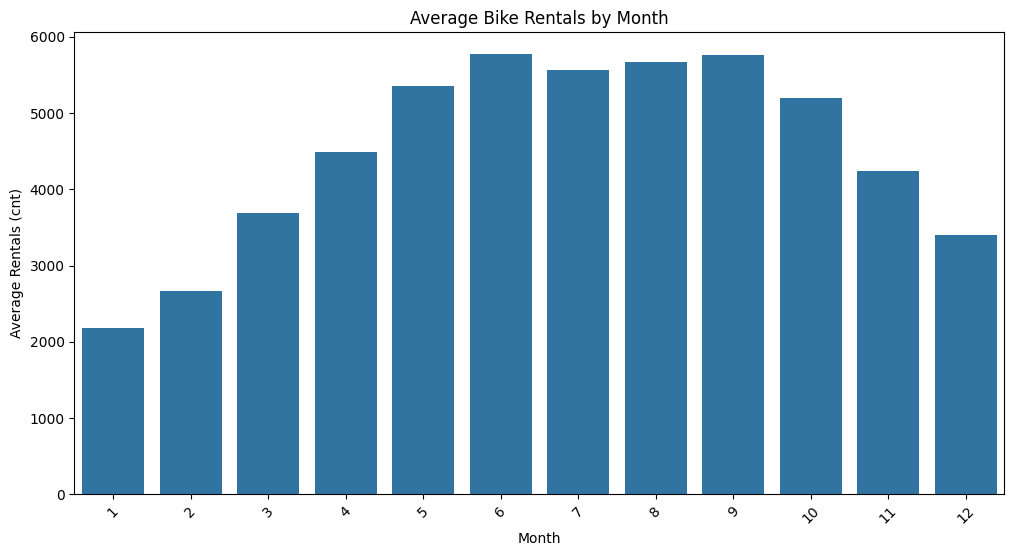

In [23]:
# Plotting average bike rentals by month
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=df.groupby('mnth')['cnt'].mean().reset_index())
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals (cnt)')
plt.xticks(rotation=45)
plt.show()

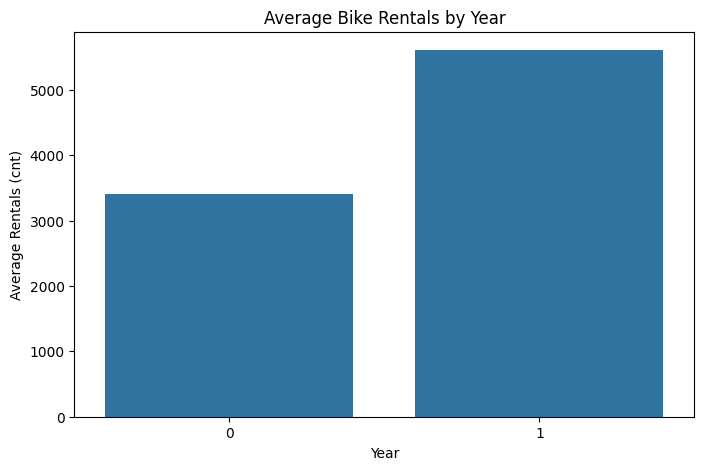

In [24]:
# Plotting average bike rentals by year
plt.figure(figsize=(8, 5))
sns.barplot(x='yr', y='cnt', data=df.groupby('yr')['cnt'].mean().reset_index())
plt.title('Average Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Average Rentals (cnt)')
plt.show()

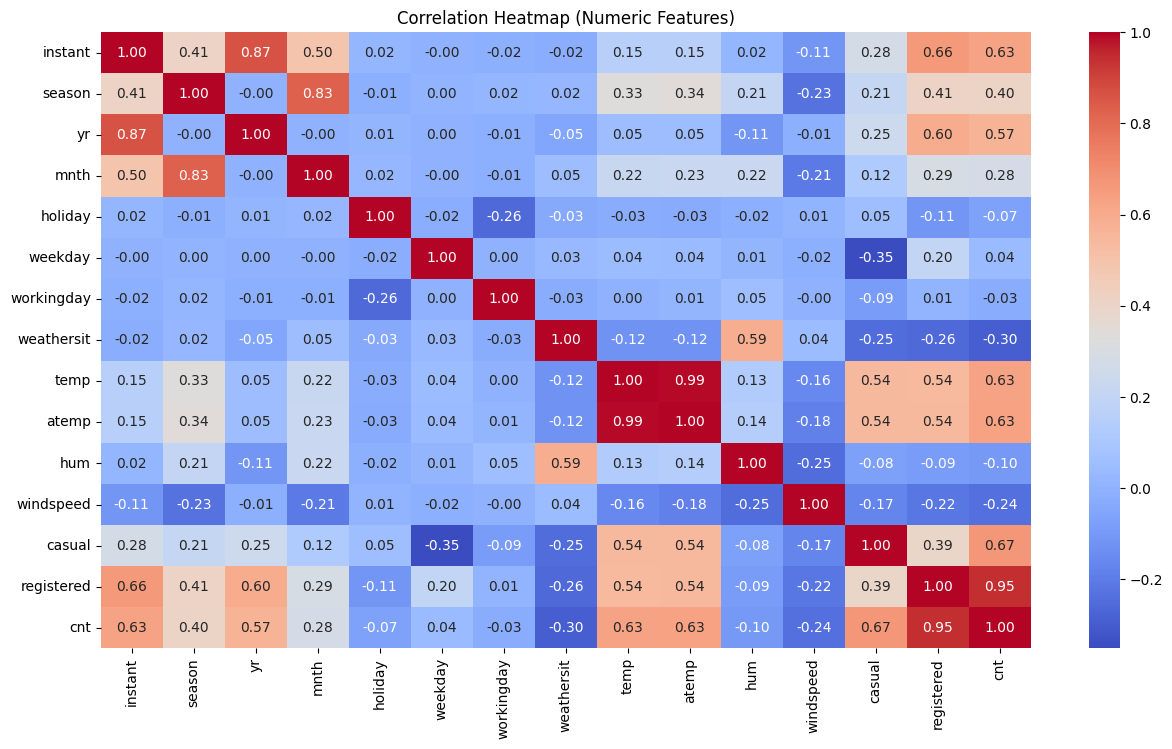

In [25]:
#correlation matrix
plt.figure(figsize = (15,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [26]:
df[['temp', 'atemp', 'cnt']].corr()

,temp,atemp,cnt
temp,1.000000,0.991696,0.627044
atemp,0.991696,1.000000,0.630685
cnt,0.627044,0.630685,1.000000


with target variable both temp andd atemp same correlation. droppig temp

In [27]:
df.drop(['temp'], axis=1, inplace=True)

###Conclusion

1. rentals increased with time. end 2019 sharp decline
2. temp and atemp correlatted. can drop temp
3. cnt = casual + registred . can drop both for model building
4. can drop dttime . since week month year are given in other columns
5. can drop instant . just index
6. season and month are correlated . one should be removed. since month gives more information resolution months should be retained

##Model Building - Linear

In [28]:
#lers drop instant and dteday
df.drop(['instant', 'dteday','casual','registered'], axis=1, inplace=True)

In [29]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,11.58500,48.3333,23.500518,1796


###One Hot Encoding

In [30]:
rides = pd.get_dummies(
    df,
    columns=['season', 'weathersit', 'mnth', 'weekday'],
    drop_first=True
)
#Dummy variables should be created after EDA because EDA aims to understand raw categorical behavior,
#while dummy encoding is required only for model input.


#dropped og season, weathersit, mnth, weekday
#also season_0, weekday_0,...

In [31]:
rides.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,18.18125,80.5833,10.749882,985,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0,0,1,17.68695,69.6087,16.652113,801,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0,1,9.47025,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [32]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    bool   
 8   season_3      730 non-null    bool   
 9   season_4      730 non-null    bool   
 10  weathersit_2  730 non-null    bool   
 11  weathersit_3  730 non-null    bool   
 12  mnth_2        730 non-null    bool   
 13  mnth_3        730 non-null    bool   
 14  mnth_4        730 non-null    bool   
 15  mnth_5        730 non-null    bool   
 16  mnth_6        730 non-null    bool   
 17  mnth_7        730 non-null    bool   
 18  mnth_8        730 non-null    

### X-y Split

In [33]:
y = rides.pop('cnt')
X = rides

### Train Test Split

In [34]:
### Train - Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

In [35]:
X_train.shape  , y_train.shape , X_test.shape , y_test.shape

((584, 28), (584,), (146, 28), (146,))

In [36]:
y_train.head()

,cnt
367,2236
648,7570
44,1913
705,5008
379,2311


In [37]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,1,0,1,6.31375,44.1250,24.499957,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
648,1,0,1,21.55835,46.3333,12.166932,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
44,0,0,1,19.91750,37.5833,27.999836,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
705,1,0,0,16.09790,76.4167,8.750200,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
379,1,0,1,8.08125,41.9167,16.834286,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### Scaling
Scale numerical features ONLY


In [38]:
numerical = ['atemp', 'hum', 'windspeed']
 #In standard OLS, scale your features as needed, but always keep your target variable in its original, interpretable scale.

In [39]:
# from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])


In [40]:
X_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed
count,584.000000,584.000000,584.000000,5.840000e+02,5.840000e+02,5.840000e+02
mean,0.513699,0.027397,0.726027,-8.364694e-17,-1.338351e-16,4.866731e-17
std,0.500241,0.163378,0.446377,1.000857e+00,1.000857e+00,1.000857e+00
min,0.000000,0.000000,0.000000,-2.426570e+00,-4.507430e+00,-1.901900e+00
25%,0.000000,0.000000,0.000000,-8.575488e-01,-7.886914e-01,-7.161146e-01
50%,1.000000,0.000000,1.000000,8.219445e-02,2.925235e-02,-1.470392e-01
75%,1.000000,0.000000,1.000000,8.385858e-01,7.138525e-01,5.414641e-01
max,1.000000,1.000000,1.000000,2.301971e+00,2.432430e+00,4.051532e+00


In [41]:
import statsmodels.api as sm

# Reset index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Ensure correct dtypes
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Add intercept
X_train = sm.add_constant(X_train)

# Fit OLS
model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          2.40e-210
Time:                        15:45:34   Log-Likelihood:                -4695.6
No. Observations:                 584   AIC:                             9449.
Df Residuals:                     555   BIC:                             9576.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2622.3744    184.491     14.214   

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,workingday,70.99
24,weekday_2,48.06
23,weekday_1,47.56
27,weekday_5,46.66
26,weekday_4,44.96
25,weekday_3,41.78
0,const,33.49
8,season_3,10.77
18,mnth_8,8.67
2,holiday,8.30


###Checking model performance scaling Target varibale also

In [43]:
#### Train - Test Split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(X.join(y), train_size = 0.80, test_size = 0.20, random_state = 100)


In [44]:
numerical = ['atemp', 'hum', 'windspeed','cnt']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train[numerical] = scaler.fit_transform(df_train[numerical])
df_test[numerical] = scaler.transform(df_test[numerical])


In [45]:
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test

In [46]:
import statsmodels.api as sm

# Reset index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Ensure correct dtypes
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Add intercept
X_train = sm.add_constant(X_train)

# Fit OLS
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          2.40e-210
Time:                        15:45:34   Log-Likelihood:                -269.38
No. Observations:                 584   AIC:                             596.8
Df Residuals:                     555   BIC:                             723.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9622      0.094    -10.206   

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,70.99
24,weekday_2,48.06
23,weekday_1,47.56
27,weekday_5,46.66
26,weekday_4,44.96
25,weekday_3,41.78
0,const,33.49
8,season_3,10.77
18,mnth_8,8.67
2,holiday,8.30


Linear scaling of the target variable (cnt) DOES NOT change the model's accuracy or significance.$R^2$ is Identical (0.853): Both models explain exactly the same amount of variance.T-values & P-values are Identical: The significance of every variable is exactly the same.Coefficients are Scaled: The only difference is the magnitude of the coefficients (e.g., yr is 1998.27 vs 1.02).

###Model A (workingday dropped)

1️⃣ workingday — VIF = 70 (VERY BAD)

Why?

workingday = function of weekday + holiday

You also included weekday dummies

📌 This is perfect logical redundancy.

✅ Action

👉 Drop workingday

In [48]:
X_trainA = X_train.drop('workingday', axis=1)
X_testA= X_test.drop('workingday', axis=1)

In [49]:
X_trainA = sm.add_constant(X_trainA)
# Fit OLS
modelA = sm.OLS(y_train, X_trainA).fit()

print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     119.1
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          2.88e-211
Time:                        15:45:34   Log-Likelihood:                -269.67
No. Observations:                 584   AIC:                             595.3
Df Residuals:                     556   BIC:                             717.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9634      0.094    -10.225   

The variable workingday was removed due to severe multicollinearity (VIF > 50) and lack of statistical significance. Its removal did not impact model performance, confirming redundancy with weekday and holiday indicators. The updated model exhibits stable coefficients and unchanged explanatory power.

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_trainA.columns
vif['VIF'] = [variance_inflation_factor(X_trainA.values, i) for i in range(X_trainA.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,33.48
7,season_3,10.76
17,mnth_8,8.67
16,mnth_7,8.16
8,season_4,7.53
6,season_2,7.22
14,mnth_5,6.70
15,mnth_6,6.55
18,mnth_9,6.28
3,atemp,6.01


In [51]:
y_train_predA = modelA.predict(X_trainA)

<Axes: ylabel='Density'>

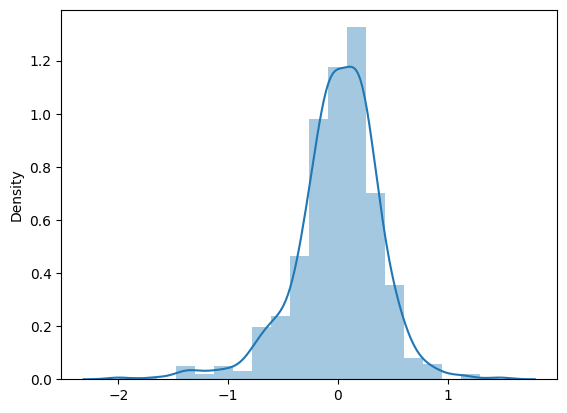

In [52]:
sns.distplot((y_train - y_train_predA), bins = 20)

In [53]:
X_testA = sm.add_constant(X_testA)
X_testA.head()

,const,yr,holiday,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,1.0,0,1,1.212800,0.054583,-1.400510,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
535,1.0,1,0,1.557640,-0.273196,-0.986692,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
299,1.0,0,0,-0.080527,1.306081,0.087772,False,False,True,True,...,False,True,False,False,False,False,False,False,False,True
221,1.0,0,0,1.334243,-1.474034,0.119705,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
152,1.0,0,0,1.079508,-2.326247,1.297557,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [54]:
y_test_predA = modelA.predict(X_testA)

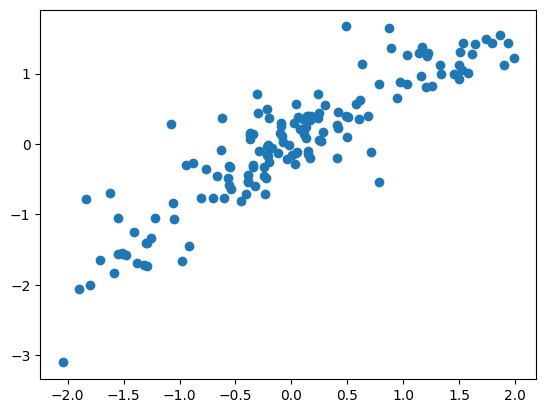

In [55]:
plt.scatter(y_test, y_test_predA)

In [56]:
from sklearn.metrics import mean_squared_error,r2_score

In [57]:
np.sqrt(mean_squared_error(y_test, y_test_predA))

np.float64(0.4138432927586103)

In [58]:
r2_score(y_test, y_test_predA)

0.8068899521676155

$R^2$ (0.807) says: "I can explain 80.7% of the fluctuations in demand." (Success Rate).RMSE (809) says: "When I am wrong, I am wrong by roughly 810 bikes." (Cost of Failure).

Train vs. Test Performance (Overfitting Check)Train $R^2$: 0.853Test $R^2$: 0.807There is a gap of ~0.046 (approx 5%).While 0.80 is a good score, the gap suggests that your model is slightly "memorizing" the training data because it has too many variables (27 variables is a lot for this dataset

###ModelB (dropping Season)

In [59]:
season_cols = [c for c in X_trainA.columns if c.startswith('season_3')]
print(season_cols)
X_trainB = X_trainA.drop(columns=season_cols)
X_testB  = X_testA.drop(columns=season_cols)

['season_3']


In [60]:
X_trainB = sm.add_constant(X_trainB)
# Fit OLS
modelB = sm.OLS(y_train, X_trainB).fit()

print(modelB.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          3.29e-211
Time:                        15:45:34   Log-Likelihood:                -272.37
No. Observations:                 584   AIC:                             598.7
Df Residuals:                     557   BIC:                             716.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9441      0.094    -10.024   

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_trainB.columns
vif['VIF'] = [variance_inflation_factor(X_trainB.values, i) for i in range(X_trainB.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.21
13,mnth_5,6.09
3,atemp,5.91
7,season_4,5.45
14,mnth_6,5.40
18,mnth_10,5.30
15,mnth_7,5.08
6,season_2,5.05
16,mnth_8,4.91
12,mnth_4,4.71


In [62]:
y_train_predB = modelB.predict(X_trainB)
X_testB = sm.add_constant(X_testB)
X_testB.head()

y_test_predB = modelB.predict(X_testB)



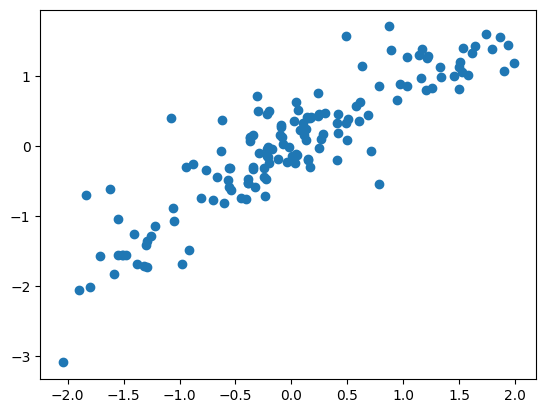

In [63]:
plt.scatter(y_test, y_test_predB)

In [64]:
from sklearn.metrics import mean_squared_error,r2_score

print(np.sqrt(mean_squared_error(y_test, y_test_predB)))


print(r2_score(y_test, y_test_predB))


0.4252702047663577
0.7960785351381039


###ModelB2 (season full drop)

In [65]:
mnth_cols = [c for c in X_trainA.columns if c.startswith('season_')]

X_trainB2 = X_trainA.drop(columns=mnth_cols)
X_testB2  = X_testA.drop(columns=mnth_cols)

In [66]:
X_trainB2 = sm.add_constant(X_trainB2)
# Fit OLS
modelB2 = sm.OLS(y_train, X_trainB2).fit()

print(modelB2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     117.7
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          1.05e-200
Time:                        15:45:35   Log-Likelihood:                -302.97
No. Observations:                 584   AIC:                             655.9
Df Residuals:                     559   BIC:                             765.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9524      0.099     -9.628   

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_trainB2.columns
vif['VIF'] = [variance_inflation_factor(X_trainB2.values, i) for i in range(X_trainB2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.10
3,atemp,5.87
13,mnth_7,5.05
14,mnth_8,4.89
12,mnth_6,4.26
15,mnth_9,3.68
11,mnth_5,3.64
16,mnth_10,2.95
10,mnth_4,2.56
9,mnth_3,2.30


In [68]:
y_train_predB2 = modelB2.predict(X_trainB2)
X_testB2 = sm.add_constant(X_testB2)
X_testB2.head()

y_test_predB2 = modelB2.predict(X_testB2)



In [69]:
from sklearn.metrics import mean_squared_error,r2_score

print(np.sqrt(mean_squared_error(y_test, y_test_predB2)))


print(r2_score(y_test, y_test_predB2))


0.43478481437184363
0.7868517536052166


###ModelC drop(mnth_5 drop)

In [70]:
X_trainC = X_trainB.drop(columns=['mnth_5'])
X_testC  = X_testB.drop(columns=['mnth_5'])

In [71]:
X_trainC = sm.add_constant(X_trainC)
# Fit OLS
modelC = sm.OLS(y_train, X_trainC).fit()

print(modelC.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     124.0
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          2.67e-209
Time:                        15:45:35   Log-Likelihood:                -279.57
No. Observations:                 584   AIC:                             611.1
Df Residuals:                     558   BIC:                             724.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7360      0.077     -9.590   

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_trainC.columns
vif['VIF'] = [variance_inflation_factor(X_trainC.values, i) for i in range(X_trainC.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.55
7,season_4,5.45
17,mnth_10,4.39
3,atemp,3.90
18,mnth_11,3.80
14,mnth_7,3.06
6,season_2,3.02
15,mnth_8,2.93
19,mnth_12,2.60
16,mnth_9,2.46


In [73]:
y_train_predC = modelC.predict(X_trainC)
X_testC = sm.add_constant(X_testC)
X_testC.head()

y_test_predC = modelC.predict(X_testC)

In [74]:
from sklearn.metrics import mean_squared_error,r2_score

print(np.sqrt(mean_squared_error(y_test, y_test_predC)))


print(r2_score(y_test, y_test_predC))

0.43650195079237103
0.7851648162840241


###ModelD drop(season_4 drop)

In [75]:
X_trainD = X_trainC.drop(columns=['season_4'])
X_testD  = X_testC.drop(columns=['season_4'])

In [76]:
X_trainD = sm.add_constant(X_trainD)
# Fit OLS
modelD = sm.OLS(y_train, X_trainD).fit()

print(modelD.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     117.6
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          1.19e-200
Time:                        15:45:35   Log-Likelihood:                -303.11
No. Observations:                 584   AIC:                             656.2
Df Residuals:                     559   BIC:                             765.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7328      0.080     -9.180   

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_trainD.columns
vif['VIF'] = [variance_inflation_factor(X_trainD.values, i) for i in range(X_trainD.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.54
3,atemp,3.90
13,mnth_7,3.06
6,season_2,3.02
14,mnth_8,2.93
15,mnth_9,2.33
4,hum,2.08
16,mnth_10,1.99
20,weekday_2,1.90
19,weekday_1,1.88


In [78]:
y_train_predD = modelD.predict(X_trainD)
X_testD = sm.add_constant(X_testD)
X_testD.head()

y_test_predD = modelD.predict(X_testD)

In [79]:
from sklearn.metrics import mean_squared_error,r2_score

print(np.sqrt(mean_squared_error(y_test, y_test_predD)))


print(r2_score(y_test, y_test_predD))

0.44971889414265975
0.7719577602904806


##SUMMARY OF MODELS
Model A (workingday dropped):

Train R-squared: 0.853
Test R-squared: 0.807
Test RMSE: 809.87
Impact: Dropping workingday improved VIFs significantly for related weekday variables without substantially hurting R-squared. The R-squared on test data is still good, and the gap between train and test R-squared is around 4.6%.
Model B (season_3 dropped from previous model A):

Train R-squared: 0.851
Test R-squared: 0.796
Test RMSE: 832.23
Impact: Dropping season_3 slightly decreased both train and test R-squared compared to Model A, and increased RMSE. The test R-squared is lower, suggesting season_3 might have been a useful predictor.
Model B2 (all 'season' dummies dropped from Model A):

Train R-squared: 0.833
Test R-squared: 0.778
Test RMSE: 868.99
Impact: This model shows a more significant drop in both train and test R-squared and a higher RMSE compared to Model A and even Model B. This indicates that the season variables collectively contribute meaningfully to the model's predictive power, and dropping all of them is detrimental.
Model C (mnth_5 dropped from Model B):

Train R-squared: 0.847
Test R-squared: 0.785
Test RMSE: 854.21
Impact: Dropping mnth_5 led to a further decrease in R-squared compared to Model A, and an increase in RMSE. This implies mnth_5 (May) might be an important predictor, or its removal caused the model to lose some explanatory power.
Model D (season_4 dropped from Model C):

Train R-squared: 0.835
Test R-squared: 0.772
Test RMSE: 880.07
Impact: Removing season_4 from Model C resulted in the lowest test R-squared and highest RMSE among all models, further indicating that season variables, particularly season_4 (likely fall/winter), are significant predictors for bike demand.
Conclusion:

##CONCLUSION

Comparing these models, Model A appears to be the best balance of performance and parsimony. It achieved a strong test R-squared of 0.807 with the lowest test RMSE (809.87) among the refined models, after intelligently addressing multicollinearity by dropping workingday. The subsequent models (B, B2, C, D), which involved dropping various season or month related variables, consistently showed a decrease in predictive performance (lower R-squared and higher RMSE) on the test set. This suggests that while workingday was redundant due to its high correlation with weekday and holiday, the season and month variables (apart from potentially redundant ones with high p-values) hold significant unique information for predicting bike rental demand.

The top 3 features (based on absolute coefficient values and statistical significance in Model A, which was the first refined model with good performance after dropping workingday) contributing significantly would likely include:

yr: Has a very high positive coefficient and significance, indicating a strong trend of increasing rentals year over year.

atemp: Also has a high positive coefficient and is highly significant, showing that perceived temperature is a major driver of bike demand.

weathersit_3: Has a large negative coefficient and is highly significant, indicating a severe drop in rentals during bad weather conditions.



Assignment-based Subjective Questions
1. From your analysis of the categorical variables from the dataset, what could you infer about
their effect on the dependent variable? (3 marks)
2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)
3. Looking at the pair-plot among the numerical variables, which one has the highest correlation
with the target variable? (1 mark)
4. How did you validate the assumptions of Linear Regression after building the model on the
training set? (3 marks)
5. Based on the final model, which are the top 3 features contributing significantly towards
explaining the demand of the shared bikes? (2 marks)




###Answers

1. Analysis of categorical variables indicates that season and weather conditions have a strong influence on bike rental demand. Rentals are higher during warmer seasons and under clear weather conditions, while adverse weather significantly reduces usage. Holidays show a negative effect on demand due to reduced commuting activity. Weekday effects are comparatively weak,**bold text**

2. When converting a categorical variable into dummy variables, using drop_first=True avoids dummy variable trap, which is a situation where dummy variables become perfectly multicollinear.
If all categories are included as dummy variables, one dummy can be perfectly predicted from the others, leading to unstable coefficients and unreliable statistical inference in linear regression. Dropping one category makes it the reference category, ensuring independent predictors and a stable model.

3. atemp/temp from heatmap

5. year,wheatersit,atemp

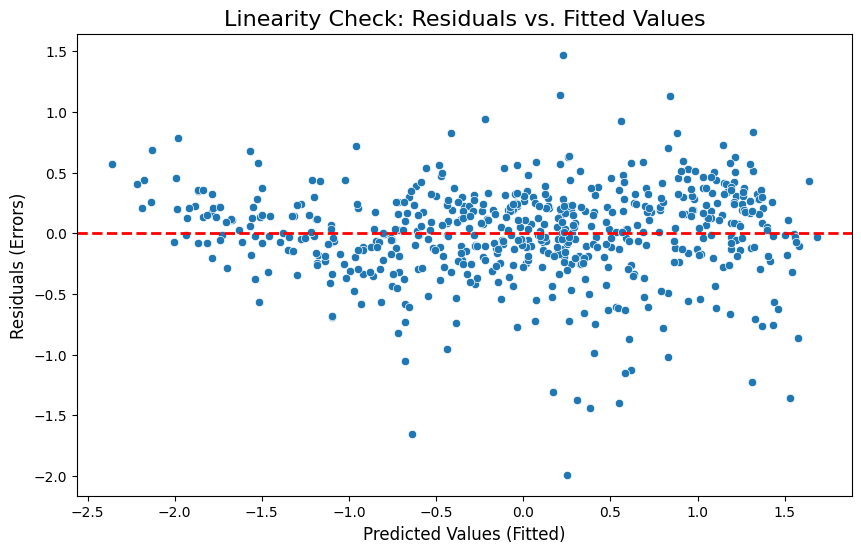

In [80]:
# 1. Get predictions and residuals from your model
y_pred = modelA.fittedvalues
residuals = modelA.resid

# 2. Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)

# 3. Add a horizontal line at 0 (The "Perfect Prediction" line)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

# 4. Labels and Title
plt.title('Linearity Check: Residuals vs. Fitted Values', fontsize=16)
plt.xlabel('Predicted Values (Fitted)', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)

plt.show()

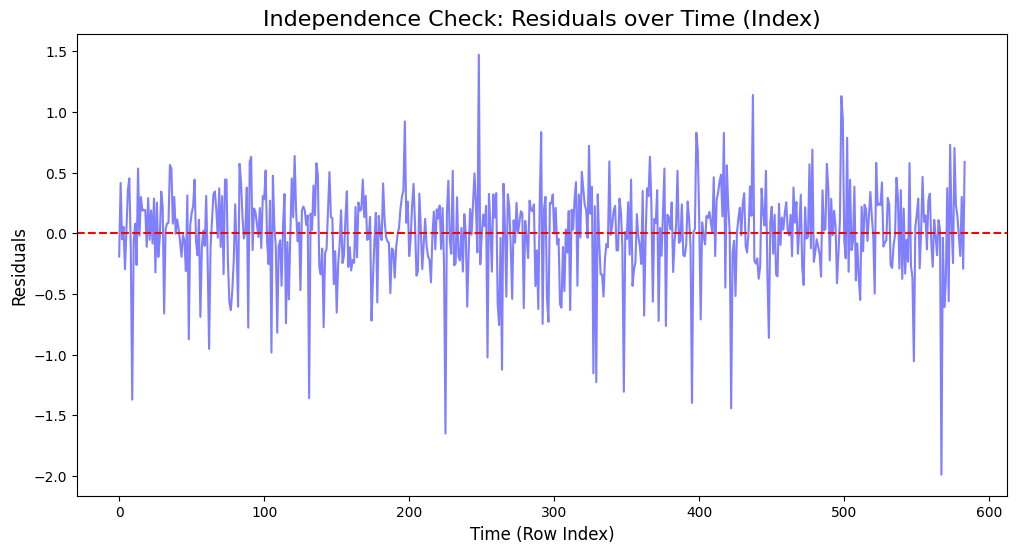

In [81]:
import matplotlib.pyplot as plt

# Get residuals
residuals = modelA.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Independence Check: Residuals over Time (Index)', fontsize=16)
plt.xlabel('Time (Row Index)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

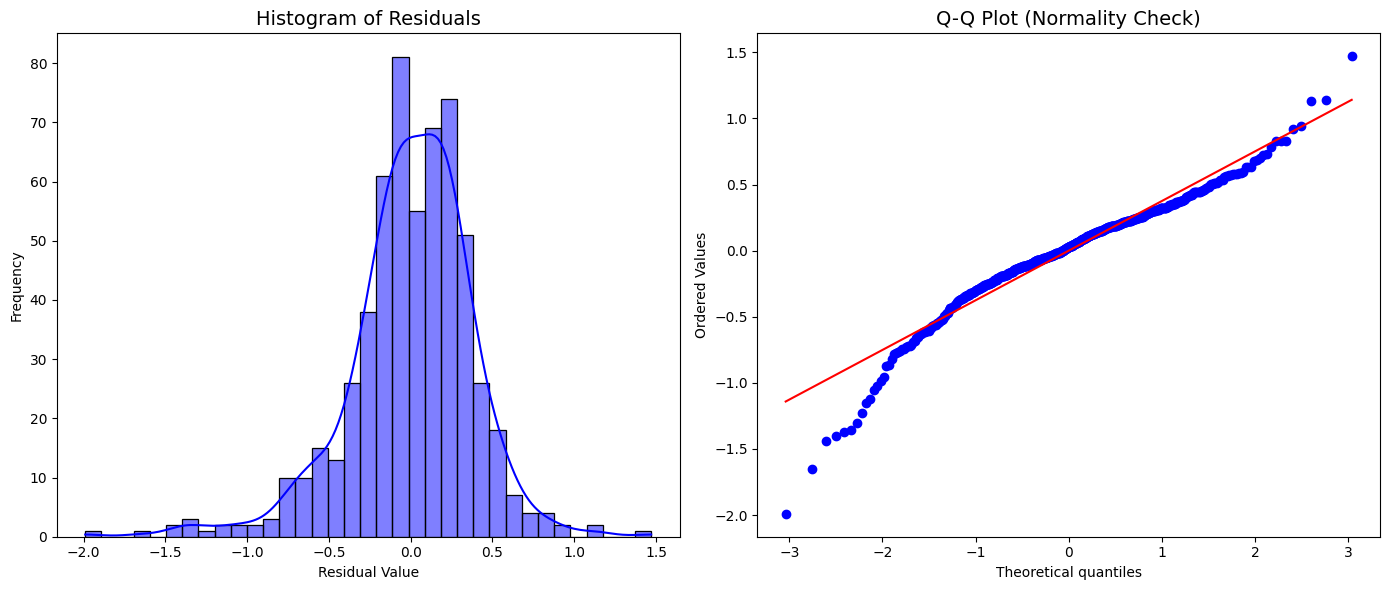

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Get the residuals
residuals = modelA.resid

# Create a figure with two subplots (side by side)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Histogram ---
sns.histplot(residuals, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Histogram of Residuals', fontsize=14)
ax[0].set_xlabel('Residual Value')
ax[0].set_ylabel('Frequency')

# --- Plot 2: Q-Q Plot ---
stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot (Normality Check)', fontsize=14)
# (stats.probplot automatically adds labels and the red line)

plt.tight_layout()
plt.show()

1. Linearity: Validated? -> YES
What we see: The blue dots are scattered randomly around the red dashed line (zero). There is no obvious curve, U-shape, or "smile/frown" pattern.

Verdict: The relationship between your features and the target is Linear. The model has successfully captured the main trend.

2. Homoscedasticity: Validated? -> MOSTLY, but with a warning
What we see:

  Left Side (Low Predictions): The cluster is tighter (smaller variance).

  Right Side (High Predictions): The cloud gets "taller." The dots spread out more vertically.

  Verdict: There is mild Heteroscedasticity (a slight "funnel shape" opening to the right).

  This means your model is more accurate when predicting low rental counts, but makes bigger errors (both positive and negative) when predicting high rental counts.

3.  Independence of Errors (No Autocorrelation)
your modelA.summary() output:

Durbin-Watson: 2.005
=> Perfect Independence (No autocorrelation).

4. Normailty of error:  from above plot its normal

5. 5. No Multicollinearity : this is verified as VIF <5

## The Linearity Assumption in OLS Regression

## 1. Key Definitions

Before understanding the assumption, we must define the two building blocks of regression diagnostics:

### **A. Fitted Value ($\hat{y}$)**
* **Definition:** The **predicted value** generated by your model for a specific data point.
* **Intuition:** This is "what the model thinks happened" based on the input features.
* **Formula:**
    $$\hat{y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n$$
* **Example:** If your model predicts 3,000 bike rentals for tomorrow, **3,000** is the Fitted Value.

### **B. Residual ($e$)**
* **Definition:** The **error** or difference between reality and the prediction.
* **Intuition:** This is "how wrong the model was."
* **Formula:**
    $$e = y_{actual} - \hat{y}_{predicted}$$
* **Example:** If actual rentals were 3,200 and the model predicted 3,000:
    $$\text{Residual} = 3200 - 3000 = +200$$

---

## 2. What is the Linearity Assumption?
The **Linearity Assumption** states that the relationship between the independent variables (Features, $X$) and the dependent variable (Target, $Y$) is **linear**.

* **Mathematically:** The change in $Y$ for a 1-unit increase in $X$ is constant, regardless of the current value of $X$.
* **Visually:** The "best fit" through the data is a straight line (or a flat plane in 3D), not a curve.

If this assumption is violated (e.g., the data follows a U-shape), your model's predictions will be biased, and your coefficients will be meaningless.

---

## 3. The Diagnostic Plot: Residuals vs. Fitted Values

To validate this assumption, we plot **Fitted Values on the X-axis** and **Residuals on the Y-axis**.

### **Why do we plot this instead of "X vs. Y"?**

You might intuitively want to plot your Input ($X$) against your Target ($Y$) to see if it looks like a line. However, in professional modeling, we use **Residuals vs. Fitted** for two critical reasons:

#### **Reason 1: The "Multidimensionality" Problem**
In Simple Linear Regression (1 variable), plotting $X$ vs. $Y$ works. But in **Multiple Linear Regression** (like your Bike Sharing model), you have 20+ variables (Temperature, Humidity, Season, etc.).
* You cannot easily visualize a 20-dimensional graph.
* Plotting just *one* $X$ against $Y$ can be misleading because other variables might be distorting the view.
* **The Solution:** The **Fitted Value** is a weighted mathematical summary of *all* your features combined. Plotting against it allows you to check the linearity of the **entire model at once**.

#### **Reason 2: The "Magnifying Glass" Effect**
When you plot $X$ vs. $Y$, the strong trend (the steep slope of the line) dominates your vision. It is very hard for the human eye to spot a subtle curve when the line is steep.
* **The Solution:** By calculating the **Residuals** (subtracting the prediction), we effectively "flatten" the regression line to zero.
* This acts like a microscope. A tiny, barely visible curve in the raw data becomes a **large, obvious pattern** in the residual plot.

---

## 4. How to Interpret the Plot

When looking at the **Residuals vs. Fitted** scatter plot:

| Visual Pattern | Interpretation | Action Required |
| :--- | :--- | :--- |
| **Random Cloud** | ✅ **Good.** The model captures the linear pattern well. The assumption is satisfied. | None. Proceed with the model. |
| **U-Shape / Curve** | ❌ **Bad (Non-Linearity).** The data has a curved relationship that the straight line missed. | Add polynomial terms (e.g., $X^2$) or use a non-linear model. |
| **Funnel Shape** | ❌ **Bad (Heteroscedasticity).** The error variance is not constant (errors get larger as predictions get larger). | Log-transform the target variable ($Y$). |

Assumption,Visual Pattern to Look For,What a Violation Looks Like
1. Linearity,Points roughly centered at 0 throughout the plot.,"A curved or ""U-shaped"" pattern."
2. Homoscedasticity,"Constant vertical spread (thickness of the ""cloud"").",A funnel or fan shape (widening/narrowing).

# Independence of Errors (No Autocorrelation)

This assumption is critical for time-series data (like daily bike rentals). It states that the error (residual) for one observation should not predict the error for the next. If errors are correlated (e.g., today's high error implies tomorrow's will also be high), standard errors and confidence intervals become unreliable.

## 1. The Statistical Check: Durbin-Watson Test

The Durbin-Watson statistic is a number between 0 and 4 that measures autocorrelation in residuals.

### **Interpretation Rule of Thumb**
* **2.0:** **Perfect Independence.** (Ideal score).
* **1.5 to 2.5:** **Normal / Acceptable.** No serious autocorrelation detected.
* **< 1.5:** **Positive Autocorrelation.** (Common in time series). "Streakiness" in errors.
* **> 2.5:** **Negative Autocorrelation.** Errors alternate rapidly between positive and negative.

### **Your Model Result**
* **Score:** `2.005`
* **Verdict:** **Pass.** Your score is almost exactly 2.0, meaning there is effectively zero autocorrelation in your model's errors.

---

## 2. The Visual Check: Residuals vs. Time Plot

While the statistic provides a number, plotting the residuals over time ensures no hidden seasonal patterns remain.

### **What to Look For**
* ✅ **Good Pattern:** A random, jagged "heartbeat" or "white noise" centered around 0. No discernible waves or trends.
* ❌ **Bad Pattern:** Smooth, wavelike cycles (e.g., residuals consistently going up in summer and down in winter). This suggests the model missed a seasonal variable.


# Normality of Residuals

This assumption states that the error terms (residuals) should follow a normal distribution (Bell Curve) with a mean of zero.

## Why it Matters
If violated, statistical tests (t-tests, F-tests) and confidence intervals may be inaccurate, particularly in small datasets. However, for large datasets (N > 50-100), the Central Limit Theorem makes OLS robust to mild violations.

## Diagnostic Checks

### 1. Histogram of Residuals
* **What to look for:** A symmetric "Bell Curve" shape centered at 0.
* **Red Flag:** Strongly skewed distributions (long tails to the left or right) or "double peaks" (bimodal).

### 2. Normal Q-Q Plot (Quantile-Quantile)
This is the most precise visual test. It plots the quantiles of your residuals against the quantiles of a theoretical normal distribution.

* ✅ **Pass:** The dots closely follow the straight, 45-degree red line.
* ❌ **Fail (Heavy Tails):** The dots form an "S-shape," deviating from the line at the top and bottom. This indicates more extreme outliers than a normal distribution expects.
* ❌ **Fail (Skew):** The dots form a curved arc (banana shape), indicating the data is piled up on one side.

## Corrective Actions (If Assumption Fails)
1.  **Check for Outliers:** Remove or treat extreme data points.
2.  **Log-Transform Target:** Applying `np.log1p(y)` often fixes skewness in the residuals.
3.  **Bootstrap:** Use bootstrapping techniques for calculating confidence intervals instead of relying on standard OLS assumptions.